
# Tipos de Datos y Binning

Cuando trabajamos en proyectos de ciencia de datos, es importante reconocer los diferentes **tipos de datos**: numéricos (discretos y contínuos), categóricos y ordinales. 

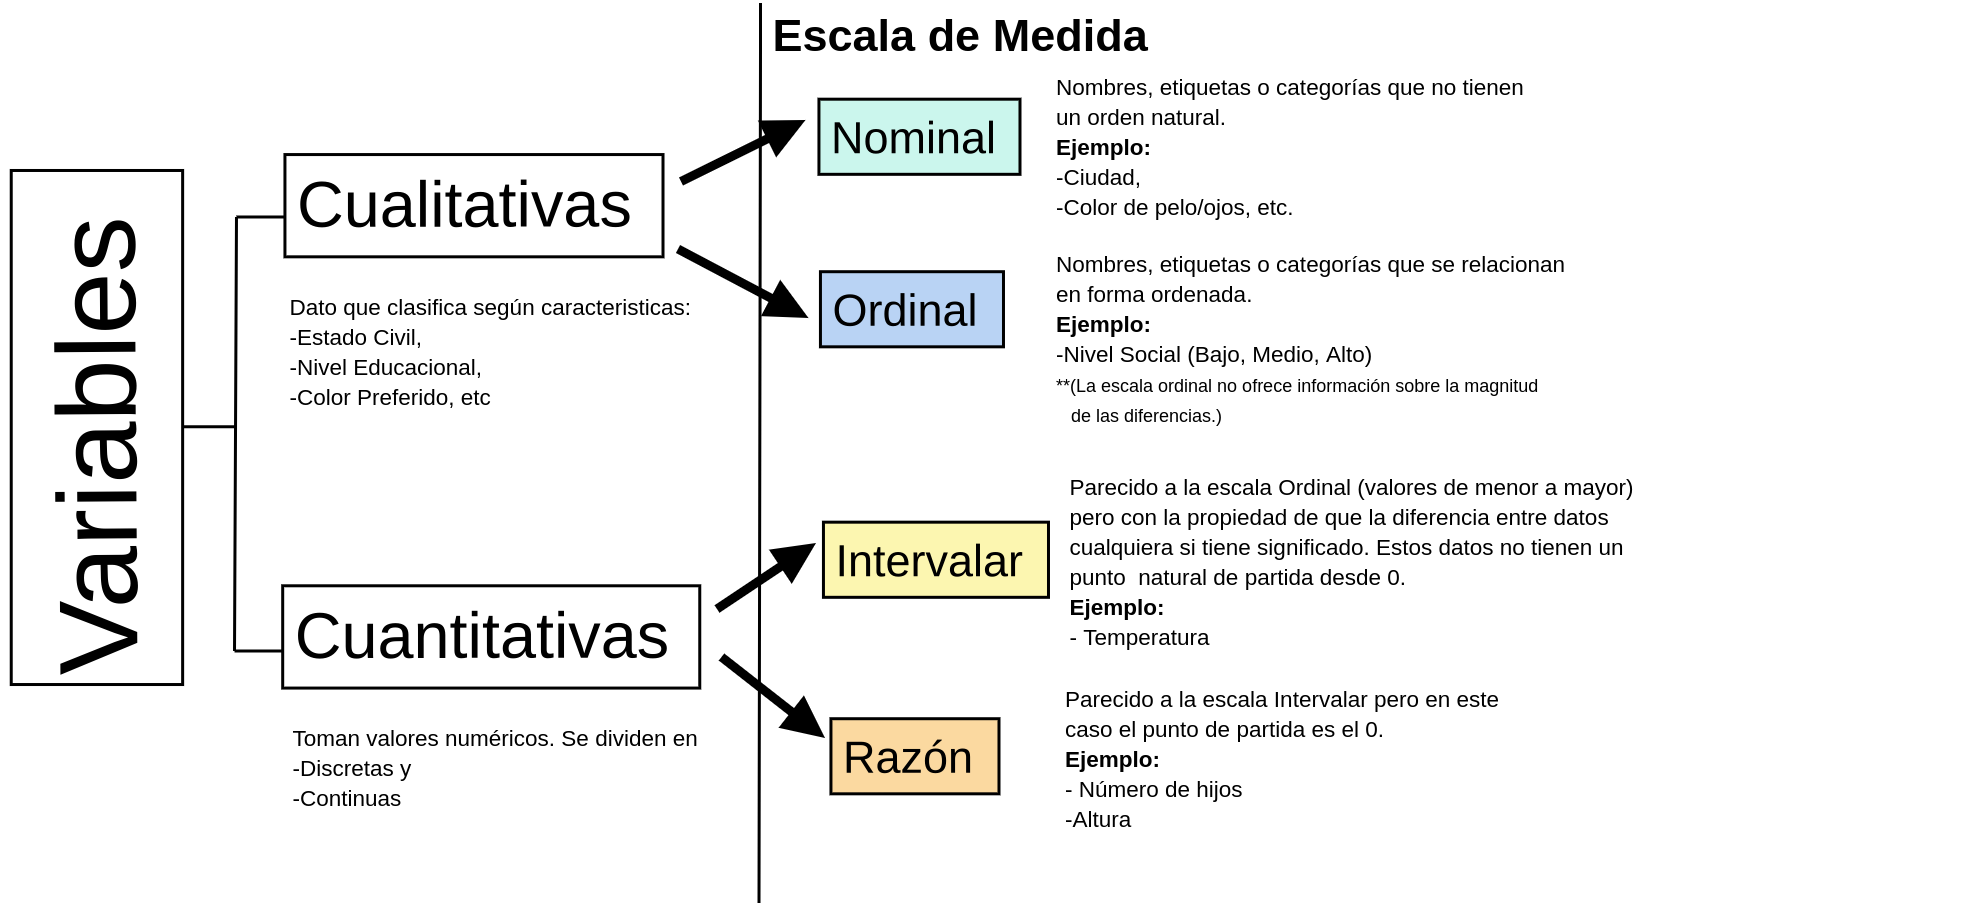

## Tipos de  variables (o datos)

Las variables o datos se pueden separar en dos categorías importantes (discutible):

1. **Cualitativas** Son variables que clasifican según características o labels. Ejemplos: estado civil, nivel educacional etc.
2. **Cuantitativas**: Toman valores numéricos y se pueden dividir
  * **Discretas**: Números que se pueden enumerar.
  * **Continuas**: Variables que toman valores en los números reales.





## Escalas de medición

Tanto las variables cualitativas como cuantitativas tienen escalas de medición asociadas.
1. **Cualitativas:**
 * **Escala Nominal:** Se clasifican en la escala nominal aquellas variables que son nombres, etiquetas o categorías que no tienen un orden natural. **Ejemplos**: Ciudad, color de pelo, color de ojos
 * **Escala Ordinal:** Se clasifican en la escala nominal aquellas variables que son nombres, etiquetas o categorías que se relacionan de forma ordenada, **Ejemplos**: Nivel social: 1 Bajo, 2:Medio, 3: Alto. Sin embargo la escala ordinal no ofrece información sobre la magnitud de las diferencias.
2. **Cuantitativas:** 
 * **Escala Intervalar:** Parecida a la escala ordinal, es decir, valores de menor a mayor, pero con la propiedad de que la diferencia entre datos cualquiera si tiene significado. Estos tipos de datos no tienen un punto de partida en 0. **Ejemplos**: Temperatura.
 * **Escala Razón:** Parecida a la escala intervalar pero en este caso el 0 es el punto de partida natural. **Ejemplos**: Número de hijos.

**¿A qué tipo de variables corresponde el siguiente dato?**

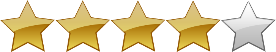

## Binning o agrupamiento de datos cuantitativos

En este botebooks nos concentraremos en cómo analizar **datos numéricos (cuantitativos)**, que se deben agrupar en clases o intervalos para poder ser analizados. `Pandas` ofrece una funcion justamente para poder armar dichos intervalos y analizar la frecuencia exsitente en cada uno de ellos. Esta es la función `cut`.

In [ ]:
# Importamos la librería pandas
import pandas as pd
import numpy as np

In [ ]:
# Generamos una serie con 6 números, que por ejemplo podría definir la cantidad de hijos de una muestra 
serie1 = np.array([1, 7, 5, 4, 6, 3])
serie1

array([1, 7, 5, 4, 6, 3])

In [ ]:
# Aquí estamos generando 2 intervalos en los cuales categorizar 
# los números del objeto serie1, con lo cual podramos ver en que intervalo hay més ocurrencias.
pd.cut(serie1, 2)

[(0.994, 4.0], (4.0, 7.0], (4.0, 7.0], (0.994, 4.0], (4.0, 7.0], (0.994, 4.0]]
Categories (2, interval[float64]): [(0.994, 4.0] < (4.0, 7.0]]

En este caso estamos pidiendo crear dos intervalos, en donde todos van a ser de igual "ancho".

In [ ]:
serie2 = pd.cut(serie1, 2)

In [ ]:
# Como se puede apreciar, cada ocurrecia del objeto serie1 
# ahora quedó categorizada en uno de los 2 intervalos definidos. 
serie2

[(0.994, 4.0], (4.0, 7.0], (4.0, 7.0], (0.994, 4.0], (4.0, 7.0], (0.994, 4.0]]
Categories (2, interval[float64]): [(0.994, 4.0] < (4.0, 7.0]]

Ahora veamos otro ejemplo en el que vamos a crear y analizar una tabla de frecuencias.

In [ ]:
s = pd.Series(np.array([2, 4, 6, 8, 10]),
              index=['a', 'b', 'c', 'd', 'e'])
s

a     2
b     4
c     6
d     8
e    10
dtype: int64

In [ ]:
tabla_freq = pd.cut(s, 3)
tabla_freq

a    (1.992, 4.667]
b    (1.992, 4.667]
c    (4.667, 7.333]
d     (7.333, 10.0]
e     (7.333, 10.0]
dtype: category
Categories (3, interval[float64]): [(1.992, 4.667] < (4.667, 7.333] < (7.333, 10.0]]

In [ ]:
tabla_freq.value_counts()

(7.333, 10.0]     2
(1.992, 4.667]    2
(4.667, 7.333]    1
dtype: int64

Ahora vamos a trabajar con set de datos más complejo, que representa las propinas de un restaurante.

In [ ]:
url = ("https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv")
tips = pd.read_csv(url)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
#coupamos el describe para analizar las metricas de las variables continuas
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
# Vamos a crear un nuevo atributo llamado cat_frec 
# donde clasificaremos el total de la cuenta (Total_bil) en alguno de 
# los 7 intervalos que definiremos con CUT.
tips['cat_frec'] = pd.cut(tips['total_bill'], 7)

In [ ]:
# Mostramos los atributos de tips y ahora tenemos el cat_frec
# con lo cual podemos contabilizar cuántos totales de cuentas están en cada intervalo
# esto es relevante pues nos permite realizar 
# histogramas de cada variable cuantitativa
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    object  
 3   smoker      244 non-null    object  
 4   day         244 non-null    object  
 5   time        244 non-null    object  
 6   size        244 non-null    int64   
 7   cat_frec    244 non-null    category
dtypes: category(1), float64(2), int64(1), object(4)
memory usage: 14.1+ KB


Primero con total bill, indicando el número de intervalos (en inglés _bin_).

array([[<AxesSubplot:title={'center':'total_bill'}>]], dtype=object)

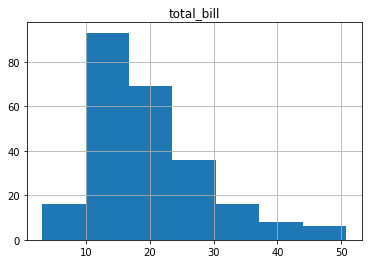

In [ ]:
tips.hist(column='total_bill', bins=7)

Y ahora con la columna que habíamos creado.

<AxesSubplot:>

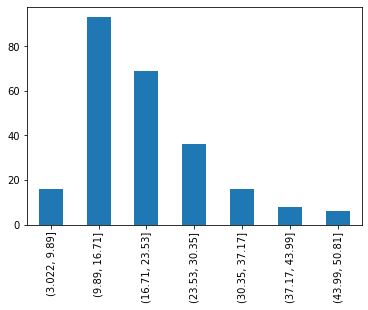

In [ ]:
tips['cat_frec'].value_counts(sort=False).plot(kind='bar')

In [ ]:
# En cada elemento del objeto Series tendremos
# el intervalo al que pertenece.
# Vemos que Pandas lo entrega como tipo "categoría"
print(tips['cat_frec'])

0      (16.71, 23.53]
1       (9.89, 16.71]
2      (16.71, 23.53]
3      (23.53, 30.35]
4      (23.53, 30.35]
            ...      
239    (23.53, 30.35]
240    (23.53, 30.35]
241    (16.71, 23.53]
242    (16.71, 23.53]
243    (16.71, 23.53]
Name: cat_frec, Length: 244, dtype: category
Categories (7, interval[float64]): [(3.022, 9.89] < (9.89, 16.71] < (16.71, 23.53] < (23.53, 30.35] < (30.35, 37.17] < (37.17, 43.99] < (43.99, 50.81]]


Recordemos que además en Pandas podemos encontrar otras medidas estadísticas:

- Media
- Mínimo
- Máximo
- Mediana
- Moda (que no sale direcatmente de `Pandas` sino de una libreria llamada `scipy`)

In [ ]:
np.mean(tips['total_bill'])

19.78594262295082

In [ ]:
np.min(tips['total_bill'])

3.07

In [ ]:
np.max(tips['total_bill'])

50.81

In [ ]:
np.median(tips['total_bill'])

17.795

In [ ]:
from scipy import stats as st

# Modas para cada columna
mode = st.mode(tips)
mode[0]

array([[13.42, 2.0, 'Male', 'No', 'Sat', 'Dinner', 2,
        Interval(9.89, 16.71, closed='right')]], dtype=object)

In [ ]:
# Podemos además el conteo de cada uno de estos valores
print(mode[1])

[[  3  33 157 151  87 176 156  93]]


In [ ]:
mode

ModeResult(mode=array([[13.42, 2.0, 'Male', 'No', 'Sat', 'Dinner', 2,
        Interval(9.89, 16.71, closed='right')]], dtype=object), count=array([[  3,  33, 157, 151,  87, 176, 156,  93]]))